<a href="https://colab.research.google.com/github/plaban1981/Pytorch_lightning/blob/main/Data_Sprint_38_The_Kvasir_Capsule_Dataset_lightning_flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
 
Artificial intelligence (AI) is predicted to have profound effects on the future of video capsule endoscopy (VCE) technology.The potential lies in improving anomaly detection while reducing manual labour. However, medical data is often sparse and unavailable to the research community, and qualified medical personnel rarely have time for the tedious labelling work.

## Objective
 

You are required to build a machine learning model to recognize the disease label of the respective images.

## Content
 

The small bowel constitutes the gastrointestinal (GI) tract’s mid-part, situated between the stomach and the large bowel. It is three to four meters long and has a surface of about 30 m^2, including the surface of the villi, and plays a crucial role in absorbing nutrients. Therefore, disorders in the small bowel may cause severe growth retardation in children and nutrient deﬁciencies in children and adults. 

This organ may be affected by 
**chronic diseases**, like 
* Crohn’s disease, 
* coeliac disease, and 
* angiectasis

or  **malignant diseases** like 
* lymphoma and 
* adenocarcinoma. 

These diseases may represent a substantial health challenge for both patients and society, and a thorough examination of the lumen is frequently necessary to diagnose and treat them. However, the small bowel, due to its anatomical location, is less accessible for inspection by ﬂexible endoscopes commonly used for the upper GI tract and the large bowel. Since early 2000, video capsule endoscopy (VCE) has been used, usually as a complementary test for patients with GI bleeding. 

A VCE consists of a small capsule containing a wide-angle camera, lightsources, batteries, and other electronics. The patient swallows the capsule, which then captures a video as it moves passively through the GI tract. A recorder, carried by the patient or included in the capsule, stores the video before a medical expert assesses it after the procedure. 

[Source of information: Reasearch paper: Kvasir-Capsule, a video capsule endoscopy dataset]

## Mount Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Import Data Science packages

In [8]:
#changing filename to paths
import os
import pandas as pd
import numpy as np
import PIL
import cv2
#
import seaborn as sns
import matplotlib.pyplot as plt
#
import warnings
warnings.filterwarnings("ignore")
#
%matplotlib inline

## Import Data

In [9]:
train_data = pd.read_csv("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/Training_set.csv")
test_data = pd.read_csv("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/Testing_set.csv")

In [10]:
train_data.head()

,filename,label
0,Image_1.jpg,Normal clean mucosa
1,Image_2.jpg,Normal clean mucosa
2,Image_3.jpg,Foreign body
3,Image_4.jpg,Normal clean mucosa
4,Image_5.jpg,Normal clean mucosa


In [21]:
train_data.shape

(37790, 2)

In [22]:
test_data.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
test_data.shape

(9448, 1)

## Unique Labels

In [ ]:
labels = train_data['label'].unique().tolist()
labels

['Normal clean mucosa',
 'Foreign body',
 'Reduced mucosal view',
 'Ileocecal valve',
 'Lymphangiectasia',
 'ulcer',
 'Angiectasia',
 'Pylorus',
 'Erosion',
 'Blood - fresh',
 'Erythema',
 'Polyp',
 'ampulla_of_vater',
 'Blood - hematin']

## Add the complete path for the training images

In [11]:
paths = [os.path.join("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train", x) for x in train_data['filename']]
test_paths = [os.path.join("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test", x) for x in test_data['filename']]

In [12]:
train_data['image_path'] = paths
test_data['image_path'] = test_paths

train_data.drop(['filename'], axis = 1, inplace=True)
test_data.drop(['filename'], axis = 1, inplace=True)

In [13]:
file_paths = train_data.image_path.values.tolist()
labels = train_data.label.values.tolist()

In [14]:
train_data.head()

,label,image_path
0,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
1,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
2,Foreign body,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
3,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
4,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...


In [27]:
train_data = train_data[['image_path','label']]
train_data.head()

,image_path,label
0,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
1,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
2,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Foreign body
3,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
4,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa


In [28]:
test_data.head()

,image_path
0,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
1,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
2,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
3,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
4,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...


## Check if Image files are empty

In [ ]:
img_list  = train_data.image_path.values.tolist()
empty_images = []
empty_index = []
for i,img in enumerate(img_list):
  if os.stat(img).st_size == 0:
    try:
      empty_images.append(img)
      empty_index.append(i)
    except:
      pass

##Train Images list

In [8]:
import os
import tqdm
train_path = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/TRAIN"
train_images = []
for folder in os.listdir("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/TRAIN"):
  for images in tqdm.tqdm(os.listdir(os.path.join(train_path,folder))):
    train_images.append(os.path.join(train_path,folder,images))



100%|██████████| 10/10 [00:00<00:00, 4414.59it/s]


In [9]:
train_images[0]

'/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/TRAIN/Normal clean mucosa/Image_36429.jpg'

##Val Images list

In [11]:
train_path = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/VAL"
val_images = []
for folder in os.listdir("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/VAL"):
  for images in tqdm.tqdm(os.listdir(os.path.join(train_path,folder))):
    val_images.append(os.path.join(train_path,folder,images))


100%|██████████| 1/1 [00:00<00:00, 565.88it/s]


In [12]:
len(train_images),len(val_images)

(37776, 3776)

In [15]:
#img_list  = train_data.image_path.values.tolist()
img_list = val_images
empty_images = []
empty_index = []
for i,img in enumerate(img_list):
  if os.stat(img).st_size == 0:
    try:
      empty_images.append(img)
      empty_index.append(i)
    except:
      pass

In [16]:
len(empty_images)

0

In [ ]:
train_data.shape

(37790, 2)

In [ ]:
train_data = train_data[~train_data['image_path'].isin(empty_images)]
train_data.shape

(37776, 2)

In [ ]:
train_new = train_data.copy()

In [ ]:
train_new.head()

,image_path,label
0,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
1,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
2,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Foreign body
3,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
4,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa


## Trian Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_set,val_set= train_test_split(train_new,test_size=0.1,stratify=train_data['label'],random_state=42)

In [ ]:
train_set.shape,val_set.shape

((33998, 2), (3778, 2))

In [ ]:
train_set.to_csv("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Training_split.csv",index=False)
val_set.to_csv("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/validation_split.csv",index=False)

In [ ]:
train_set.head()

,image_path,label
36036,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
471,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
4195,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
6903,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa
37061,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Ileocecal valve


## Apply Startified kfolds to handle imbalanced dataset

In [ ]:
from sklearn.model_selection import StratifiedKFold
dfx = train_new.copy()
#assign default value to fold
dfx["kfold"] = -1

# Shuffle data
dfx = dfx.sample(frac=1).reset_index(drop=True)

kf = StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=dfx, y=dfx.label.values)):
    print(len(trn_), len(val_))
    dfx.loc[val_, 'kfold'] = fold


30220 7556
30221 7555
30221 7555
30221 7555
30221 7555


In [ ]:
dfx.head()

,image_path,label,kfold
0,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa,0
1,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa,0
2,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa,0
3,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Normal clean mucosa,0
4,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,Reduced mucosal view,0


In [ ]:
dfx.kfold.value_counts()

0    7556
4    7555
3    7555
2    7555
1    7555
Name: kfold, dtype: int64

In [ ]:
dfx.to_csv("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train_set_folds.csv",index=False)

## Start of Pytorch Lightning Flash


In [2]:
!pip install pytorch-lightning

     |████████████████████████████████| 819kB 15.3MB/s 
     |████████████████████████████████| 645kB 25.7MB/s 
     |████████████████████████████████| 122kB 50.0MB/s 
     |████████████████████████████████| 10.6MB 47.1MB/s 
     |████████████████████████████████| 235kB 41.6MB/s 
     |████████████████████████████████| 829kB 46.9MB/s 
     |████████████████████████████████| 1.3MB 45.2MB/s 
     |████████████████████████████████| 143kB 55.6MB/s 
     |████████████████████████████████| 296kB 50.9MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=63cb522765ba96ee93607d0797237b707379a40abe85700f2de4044aacdfc91b
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.4.1 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully un

In [3]:
import pytorch_lightning as pl
print(pl.__version__)

1.3.8


In [ ]:
! pip install git+https://github.com/PyTorchLightning/lightning-flash.git

  Cloning https://github.com/PyTorchLightning/lightning-flash.git to /tmp/pip-req-build-6ebspcyi
  Running command git clone -q https://github.com/PyTorchLightning/lightning-flash.git /tmp/pip-req-build-6ebspcyi
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for lightning-flash: filename=lightning_flash-0.4.1.dev0-cp37-none-any.whl size=227900 sha256=38f33ebee4183054f360d0b04fd9ccfaa7c6c9f01e065cf9754d226dd13fe620
  Stored in directory: /tmp/pip-ephem-wheel-cache-_2j308vq/wheels/91/2d/5d/a5c188ff0462566709ba09d64e4f051cfa6cf2714ebefa1c77
Successfully built lightning-flash


In [4]:
! pip install lightning-flash[image]

     |████████████████████████████████| 225kB 14.0MB/s 
     |████████████████████████████████| 256kB 21.1MB/s 
     |████████████████████████████████| 92kB 11.6MB/s 
     |████████████████████████████████| 286kB 24.9MB/s 
     |████████████████████████████████| 2.4MB 30.8MB/s 
     |████████████████████████████████| 378kB 52.0MB/s 
     |████████████████████████████████| 3.0MB 51.1MB/s 
     |████████████████████████████████| 563kB 44.4MB/s 
     |████████████████████████████████| 79.9MB 79kB/s 
     |████████████████████████████████| 225kB 57.2MB/s 
     |████████████████████████████████| 20.6MB 1.5MB/s 
     |████████████████████████████████| 133kB 57.9MB/s 
     |████████████████████████████████| 573kB 27.1MB/s 
     |████████████████████████████████| 61kB 11.5MB/s 
     |████████████████████████████████| 29.3MB 165kB/s 
     |████████████████████████████████| 36.7MB 144kB/s 
     |████████████████████████████████| 112kB 60.0MB/s 
     |████████████████████████████████| 81kB 11.6MB

In [1]:
import torch
torch.__version__

'1.9.0+cu102'

In [30]:
!sudo pip install pillow==8.2.0

In [31]:
!pip install pillow==8.2.0

In [1]:
import PIL
PIL.__version__

'8.2.0'

In [2]:
import flash
print(flash.__version__)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


0.4.0


In [3]:
import flash
from flash.core.data.utils import download_data
from flash.image import ImageClassificationData, ImageClassifier
print(flash.__version__)#0.2.1
#
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint,EarlyStopping

print(pl.__version__)#
#print(pillow.__version__)
#
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

0.4.0
1.3.8


In [ ]:
!pip install fiftyone

     |████████████████████████████████| 2.4MB 14.4MB/s 
     |████████████████████████████████| 112kB 54.7MB/s 
     |████████████████████████████████| 133kB 56.2MB/s 
     |████████████████████████████████| 225kB 58.7MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 36.7MB 150kB/s 
     |████████████████████████████████| 573kB 49.0MB/s 
     |████████████████████████████████| 20.6MB 1.4MB/s 
     |████████████████████████████████| 563kB 47.5MB/s 
     |████████████████████████████████| 79.9MB 109kB/s 
     |████████████████████████████████| 29.3MB 188kB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
     |████████████████████████████████| 7.7MB 47.7MB/s 
     |████████████████████████████████| 194kB 54.6MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
     |████████████████████████████████| 143kB 59.0MB/s 
     |████████████████████████████████| 61kB 9.8MB/s

In [ ]:
%%capture
! pip install git+https://github.com/PyTorchLightning/lightning-flash.git

In [4]:
import flash
from flash.core.data.utils import download_data
from flash.image import ImageClassificationData, ImageClassifier
from  torchmetrics import Accuracy,F1,FBeta
from flash.core.finetuning import FreezeUnfreeze
import flash
from flash import Trainer
from flash.core.classification import Labels

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
import flash
from flash.image import ImageClassificationData, ImageClassifier
from flash.core.finetuning import FlashBaseFinetuning
print(flash.__version__)#0.2.1
#
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets,models
import pytorch_lightning as pl
print(pl.__version__)#1.2.0rc0

0.4.0
1.3.8


In [6]:
# 2. Load the data

datamodule = ImageClassificationData.from_folders(
    train_folder = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/TRAIN/",
    val_folder = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/VAL/",
    predict_folder = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/"
)
    

In [7]:
datamodule.num_classes

14

In [ ]:
from torchvision.models import densenet121
model = densenet121(pretrained=True)
print(model)




Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth



DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
# This is useful to create new backbone and make them accessible from `ImageClassifier`
@ImageClassifier.backbones(name="densenet121")
def fn_resnet(pretrained: bool = True):
    model = densenet121(pretrained)
    # remove the last two layers & turn it into a Sequential model
    backbone = nn.Sequential(*list(model.children())[:-5])
    num_features = model.classifier.in_features
    # backbones need to return the num_features to build the head
    return backbone, num_features

In [ ]:
# 3.b Optional: List available backbones
print(ImageClassifier.available_backbones())

['adv_inception_v3', 'bat_resnext26ts', 'botnet26t_256', 'botnet50ts_256', 'cait_m36_384', 'cait_m48_448', 'cait_s24_224', 'cait_s24_384', 'cait_s36_384', 'cait_xs24_384', 'cait_xxs24_224', 'cait_xxs24_384', 'cait_xxs36_224', 'cait_xxs36_384', 'coat_lite_mini', 'coat_lite_small', 'coat_lite_tiny', 'coat_mini', 'coat_tiny', 'convit_base', 'convit_small', 'convit_tiny', 'cspdarknet53', 'cspdarknet53_iabn', 'cspresnet50', 'cspresnet50d', 'cspresnet50w', 'cspresnext50', 'cspresnext50_iabn', 'darknet53', 'deit_base_distilled_patch16_224', 'deit_base_distilled_patch16_384', 'deit_base_patch16_224', 'deit_base_patch16_384', 'deit_small_distilled_patch16_224', 'deit_small_patch16_224', 'deit_tiny_distilled_patch16_224', 'deit_tiny_patch16_224', 'densenet121', 'densenet121', 'densenet121', 'densenet121', 'densenet121', 'densenet121d', 'densenet161', 'densenet169', 'densenet201', 'densenet264', 'densenet264d_iabn', 'densenetblur121d', 'dino_deits16', 'dino_deits8', 'dino_vitb16', 'dino_vitb8', '

In [8]:
model = ImageClassifier(backbone="densenet121",
                        num_classes=datamodule.num_classes,
                        metrics=[FBeta(num_classes=14),Accuracy()])

In [ ]:
model.children

<bound method Module.children of ImageClassifier(
  (metrics): ModuleDict(
    (fbeta): FBeta()
    (accuracy): Accuracy()
  )
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): Ba

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# 5. Create the trainer
trainer = flash.Trainer(gpus=1,progress_bar_refresh_rate = 20,
                        max_epochs=5)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [11]:
trainer.finetune(model, datamodule=datamodule, strategy=FreezeUnfreeze(unfreeze_epoch=1))

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | metrics  | ModuleDict | 0     
1 | backbone | Sequential | 7.0 M 
2 | head     | Sequential | 14.3 K
----------------------------------------
98.0 K    Trainable params
6.9 M     Non-trainable params
7.0 M     Total params
27.873    Total estimated model params size (MB)


In [12]:
trainer.fit(model,datamodule=datamodule,)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | metrics  | ModuleDict | 0     
1 | backbone | Sequential | 7.0 M 
2 | head     | Sequential | 14.3 K
----------------------------------------
98.0 K    Trainable params
6.9 M     Non-trainable params
7.0 M     Total params
27.873    Total estimated model params size (MB)


In [13]:
trainer.save_checkpoint("/content/drive/MyDrive/dphi/Kvasir/image_classification_model.pt")

In [5]:
model = ImageClassifier.load_from_checkpoint("/content/drive/MyDrive/dphi/Kvasir/image_classification_model.pt")

In [6]:
model.serializer = Labels()

In [15]:
test_data.head()

,image_path
0,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
1,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
2,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
3,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
4,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...


In [16]:
pred_images  = test_data.values.tolist()

In [17]:
imgs = [i[0] for i in pred_images ]


In [41]:
imgs

['/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_1.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_2.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_3.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_4.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_5.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_6.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_7.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_8.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_9.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_10.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_11.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_12.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test/Image_13.jpg',
 '/content/drive/MyDr

In [23]:
import tqdm
predictions = []
for pred_img in tqdm.tqdm(imgs):
  predictions.append(model.predict(pred_img))

100%|██████████| 9448/9448 [15:24<00:00, 10.22it/s]


In [26]:
preds = [i[0] for i in predictions]

## Visualize Predictions

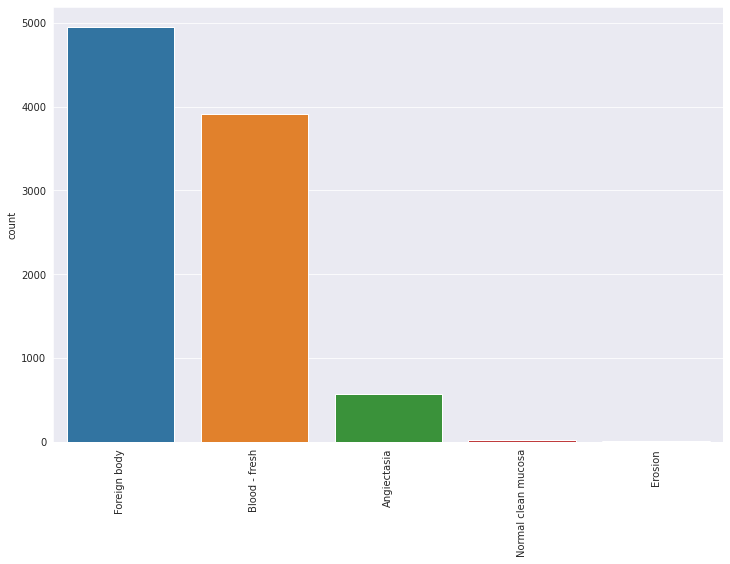

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(preds)

## End of Pytorch Lightning Flash


https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538

https://pytorch-lightning.readthedocs.io/en/stable/advanced/lr_finder.html